## Preservation Analysis at US_Ho1


- Bin Wang

- 2023/02/24


**US-Ho1**: https://ameriflux.lbl.gov/sites/siteinfo/US-Ho1

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import scipy
from scipy import stats
from netCDF4 import Dataset

print('numpy version',np.__version__)
print('scipy version',scipy.__version__)

numpy version 1.19.2
scipy version 1.6.2


### Function of confidence interval

In [2]:
def lower_bound(df):
    alpha = 0.05
    return df.mean() - stats.t.ppf(1-alpha/2, df.shape[0]-1) * df.std(ddof=1)/np.sqrt(df.shape[0])

def upper_bound(df):
    alpha = 0.05
    return df.mean() + stats.t.ppf(1-alpha/2, df.shape[0]-1) * df.std(ddof=1)/np.sqrt(df.shape[0])
    
def confi_interval(var):
    lower = np.apply_along_axis(lower_bound,0,var)
    upper = np.apply_along_axis(upper_bound,0,var)
    
    return lower,upper

## Data with descending partitioning pattern

In [3]:
# US-SPR
df_1R       = Dataset('1R_default.nc','r')
df_3R_de    = Dataset('3R_default_descend.nc','r')
df_3R_as    = Dataset('3R_default_ascend.nc','r')
df_3R_as_dd = Dataset('3R_default_ascend_dd.nc','r')
df_3R_de_dd = Dataset('3R_default_descend_dd.nc','r')

## GPP

In [4]:
######################Data########################
pft = int(0)
gpp_pft_elm = df_1R.variables['gpp_pft'][:].squeeze()[:]
gpp_pft_tam_de = df_3R_de.variables['gpp_pft'][:].squeeze()[:]
gpp_pft_tam_as = df_3R_as.variables['gpp_pft'][:].squeeze()[:]

gpp_interval_de= confi_interval(gpp_pft_tam_de)
gpp_interval_as= confi_interval(gpp_pft_tam_as)

NameError: name 'gpp_pft_tam' is not defined

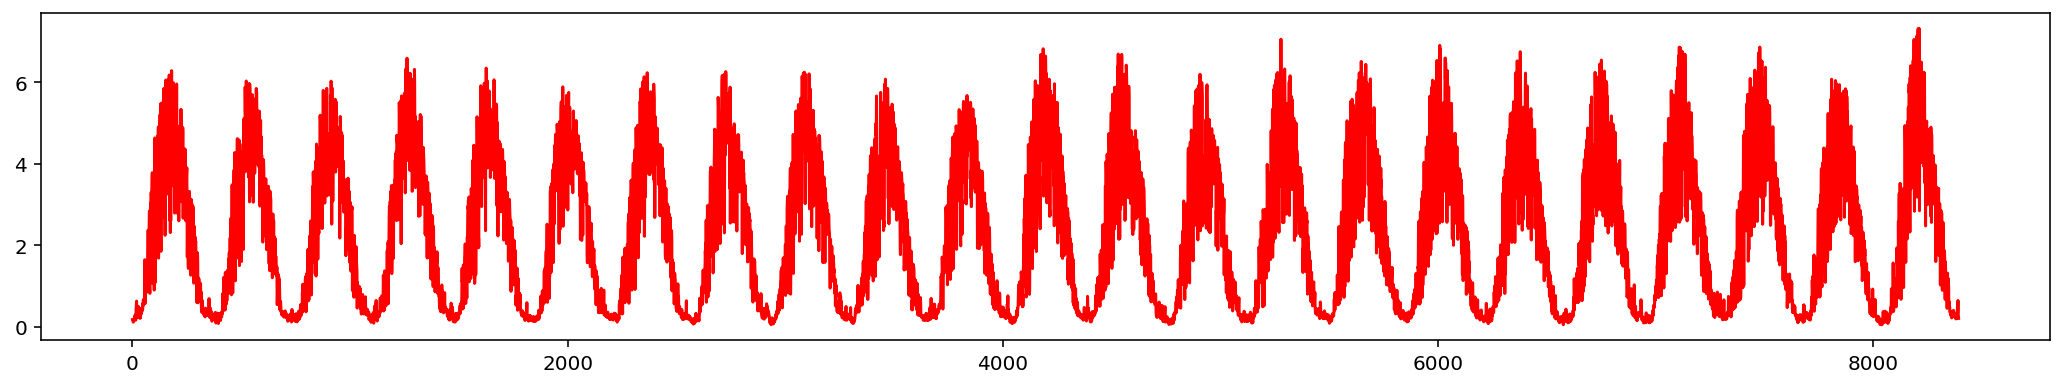

In [5]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
#ELM
ax.plot(gpp_pft_elm,c='red')
#TAM
for i in range(gpp_pft_tam.shape[0]):
    ax.plot(gpp_pft_tam[i,:],c='grey',alpha=0.4)

ax.plot(gpp_pft_tam[:,:].mean(axis=0),color='blue')
ax.fill_between(x=range(gpp_pft_tam.shape[1]), y1=gpp_interval[0],y2=gpp_interval[1],facecolor='blue', alpha=0.5)

plt.show()

NameError: name 'gpp_pft_elm' is not defined

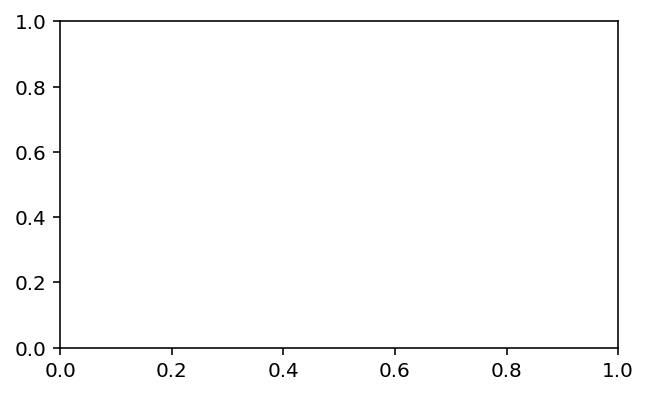

In [4]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(gpp_pft_elm[-365:],c='red',linewidth=0.5)
#TAM

ax.plot(gpp_pft_tam_de[:,-365:].mean(axis=0),color='blue',linewidth=0.5)
ax.fill_between(x=range(gpp_pft_tam_de[:,-365:].shape[1]), y1=gpp_interval_de[0][-365:],y2=gpp_interval_de[1][-365:],facecolor='blue', alpha=0.5)

ax.plot(gpp_pft_tam_as[:,-365:].mean(axis=0),color='green',linewidth=0.5)
ax.fill_between(x=range(gpp_pft_tam_as[:,-365:].shape[1]), y1=gpp_interval_as[0][-365:],y2=gpp_interval_as[1][-365:],facecolor='green', alpha=0.5)

ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('GPP(g C m$^{-2}$d$^{-1}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)

#plt.savefig("gpp_combined.pdf",bbox_inches='tight')

plt.show()

In [5]:
gpp_pft_elm       = df_1R.variables['gpp_pft'][:].squeeze()[:]
gpp_pft_tam_de    = df_3R_de.variables['gpp_pft'][:].squeeze()[:]
gpp_pft_tam_as    = df_3R_as.variables['gpp_pft'][:].squeeze()[:]
gpp_pft_tam_as_dd = df_3R_as_dd.variables['gpp_pft'][:].squeeze()[:,:]
gpp_pft_tam_de_dd = df_3R_de_dd.variables['gpp_pft'][:].squeeze()[:,:]

# daily resolution
gpp_interval_de    = confi_interval(gpp_pft_tam_de)
gpp_interval_as    = confi_interval(gpp_pft_tam_as)
gpp_interval_as_dd = confi_interval(gpp_pft_tam_as_dd)
gpp_interval_de_dd = confi_interval(gpp_pft_tam_de_dd)

In [6]:
gpp95_tam_de   =gpp_pft_tam_de[:,-365:].mean(axis=0).sum()-confi_interval(gpp_pft_tam_de[:,-365:].sum(axis=1))[0]
gpp95_tam_de_dd=gpp_pft_tam_de_dd[:,-365:].mean(axis=0).sum()-confi_interval(gpp_pft_tam_de_dd[:,-365:].sum(axis=1))[0]

gpp95_tam_as    = gpp_pft_tam_as[:,-365:].mean(axis=0).sum()-confi_interval(gpp_pft_tam_as[:,-365:].sum(axis=1))[0]
gpp95_tam_as_dd = gpp_pft_tam_as_dd[:,-365:].mean(axis=0).sum()-confi_interval(gpp_pft_tam_as_dd[:,-365:].sum(axis=1))[0]

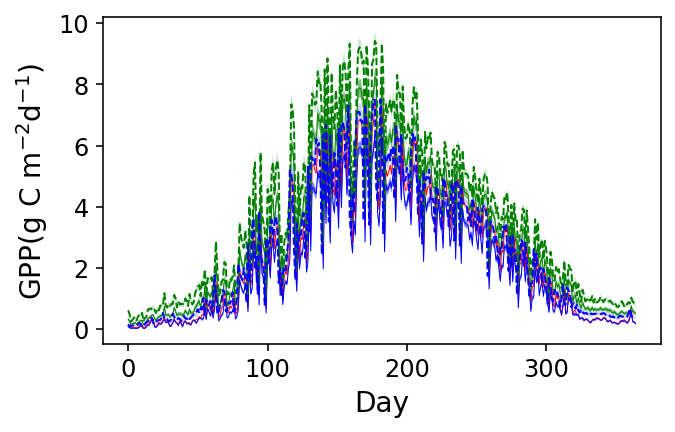

In [7]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(gpp_pft_elm[-365:],c='red',linewidth=0.5)
#TAM

# descend
ax.plot(gpp_pft_tam_de[:,-365:].mean(axis=0),color='blue',linewidth=0.5)
ax.fill_between(x=range(gpp_pft_tam_de[:,-365:].shape[1]), y1=gpp_interval_de[0][-365:],y2=gpp_interval_de[1][-365:],facecolor='blue', alpha=0.5)

# ascend
ax.plot(gpp_pft_tam_as[:,-365:].mean(axis=0),color='green',linewidth=0.5)
ax.fill_between(x=range(gpp_pft_tam_as[:,-365:].shape[1]), y1=gpp_interval_as[0][-365:],y2=gpp_interval_as[1][-365:],facecolor='green', alpha=0.5)

# ascend with Dynamic Distribution
ax.plot(gpp_pft_tam_as_dd[:,-365:].mean(axis=0),color='green',linewidth=1.0,linestyle='--')
ax.fill_between(x=range(gpp_pft_tam_as_dd[:,-365:].shape[1]), y1=gpp_interval_as_dd[0][-365:],y2=gpp_interval_as_dd[1][-365:],facecolor='green',alpha=0.2)


# descend with Dynamic Distribution
ax.plot(gpp_pft_tam_de_dd[:,-364:].mean(axis=0),color='blue',linewidth=1.0,linestyle='--')
ax.fill_between(x=range(gpp_pft_tam_de_dd[:,-365:].shape[1]), y1=gpp_interval_de_dd[0][-365:],y2=gpp_interval_de_dd[1][-365:],facecolor='blue', alpha=0.2)

ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('GPP(g C m$^{-2}$d$^{-1}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)

#plt.savefig("gpp_combined.pdf",bbox_inches='tight')

plt.show()

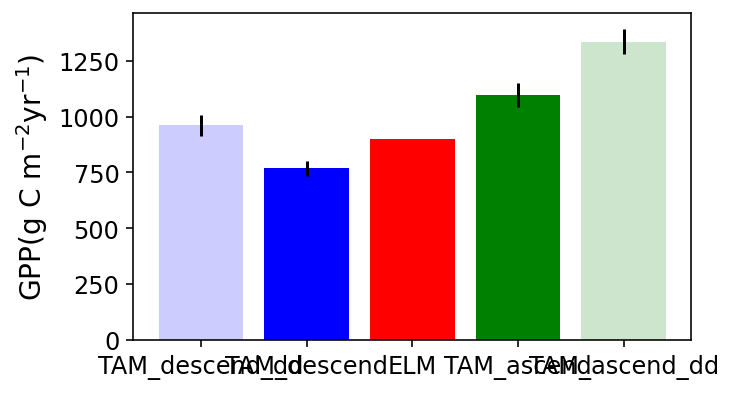

In [8]:
fig,ax = plt.subplots(1,1,figsize=(5,3))

# descend w/ dynamic distribution
ax.bar(['TAM_descend_dd'],gpp_pft_tam_de_dd[:,-364:].mean(axis=0).sum(),yerr=[gpp95_tam_de_dd],color='blue',alpha=0.2)

# descend
ax.bar(['TAM_descend'],gpp_pft_tam_de[:,-365:].mean(axis=0).sum(),yerr=[gpp95_tam_de],color='blue')

#ELM
ax.bar(['ELM'],gpp_pft_elm[-365:].sum(),color='red')

# ascend
ax.bar(['TAM_ascend'],gpp_pft_tam_as[:,-365:].mean(axis=0).sum(),yerr=[gpp95_tam_as],color='green')

# ascend w/ dynamic distribution
ax.bar(['TAM_ascend_dd'],gpp_pft_tam_as_dd[:,-365:].mean(axis=0).sum(),yerr=[gpp95_tam_as_dd],color='green',alpha=0.2)

#ax.set_xlabel(size=14,weight='normal')
ax.set_ylabel('GPP(g C m$^{-2}$yr$^{-1}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)


#plt.savefig("gpp_annual_combined.pdf",bbox_inches='tight')

plt.show()

## Respiration

In [14]:
######################Data########################
hr_elm       = df_1R.variables['hr'][:].squeeze()[:]
hr_tam_de    = df_3R_de.variables['hr'][:].squeeze()[:]
hr_tam_as    = df_3R_as.variables['hr'][:].squeeze()[:]
hr_tam_as_dd = df_3R_as_dd.variables['hr'][:].squeeze()[:,:]
hr_tam_de_dd = df_3R_de_dd.variables['hr'][:].squeeze()[:,:]

# daily resolution
hr_interval_de    = confi_interval(hr_tam_de)
hr_interval_as    = confi_interval(hr_tam_as)
hr_interval_as_dd = confi_interval(hr_tam_as_dd)
hr_interval_de_dd = confi_interval(hr_tam_de_dd)

In [15]:
hr95_tam_de   =hr_tam_de[:,-365:].mean(axis=0).sum()-confi_interval(hr_tam_de[:,-365:].sum(axis=1))[0]
hr95_tam_de_dd=hr_tam_de_dd[:,-365:].mean(axis=0).sum()-confi_interval(hr_tam_de_dd[:,-365:].sum(axis=1))[0]

hr95_tam_as    = hr_tam_as[:,-365:].mean(axis=0).sum()-confi_interval(hr_tam_as[:,-365:].sum(axis=1))[0]
hr95_tam_as_dd = hr_tam_as_dd[:,-365:].mean(axis=0).sum()-confi_interval(hr_tam_as_dd[:,-365:].sum(axis=1))[0]

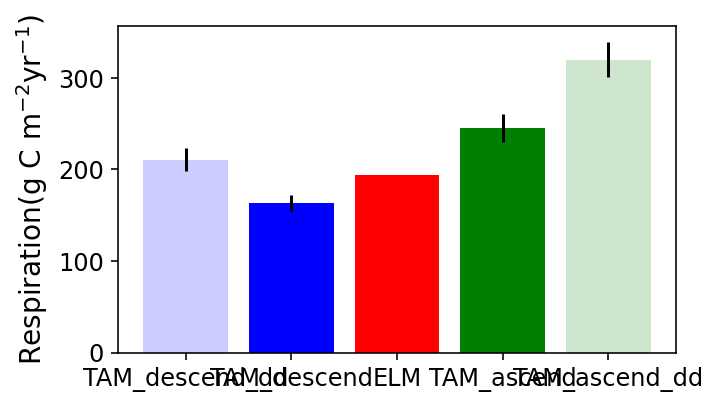

In [10]:
fig,ax = plt.subplots(1,1,figsize=(5,3))

# descend w/ dynamic distribution
ax.bar(['TAM_descend_dd'],hr_tam_de_dd[:,-364:].mean(axis=0).sum(),yerr=[hr95_tam_de_dd],color='blue',alpha=0.2)

# descend
ax.bar(['TAM_descend'],hr_tam_de[:,-365:].mean(axis=0).sum(),yerr=[hr95_tam_de],color='blue')

#ELM
ax.bar(['ELM'],hr_elm[-365:].sum(),color='red')

# ascend
ax.bar(['TAM_ascend'],hr_tam_as[:,-365:].mean(axis=0).sum(),yerr=[hr95_tam_as],color='green')

# ascend w/ dynamic distribution
ax.bar(['TAM_ascend_dd'],hr_tam_as_dd[:,-365:].mean(axis=0).sum(),yerr=[hr95_tam_as_dd],color='green',alpha=0.2)

#ax.set_xlabel(size=14,weight='normal')
ax.set_ylabel('Respiration(g C m$^{-2}$yr$^{-1}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)


#plt.savefig("gpp_annual_combined.pdf",bbox_inches='tight')

plt.show()

## LAI

In [9]:
######################Data########################
pft = int(0)
lai_pft_elm = df_1R.variables['lai_pft'][:].squeeze()[:]
lai_pft_tam_de = df_3R_de.variables['lai_pft'][:].squeeze()[:]
lai_pft_tam_as = df_3R_as.variables['lai_pft'][:].squeeze()[:]

lai_interval_de = confi_interval(lai_pft_tam_de)
lai_interval_as = confi_interval(lai_pft_tam_as)

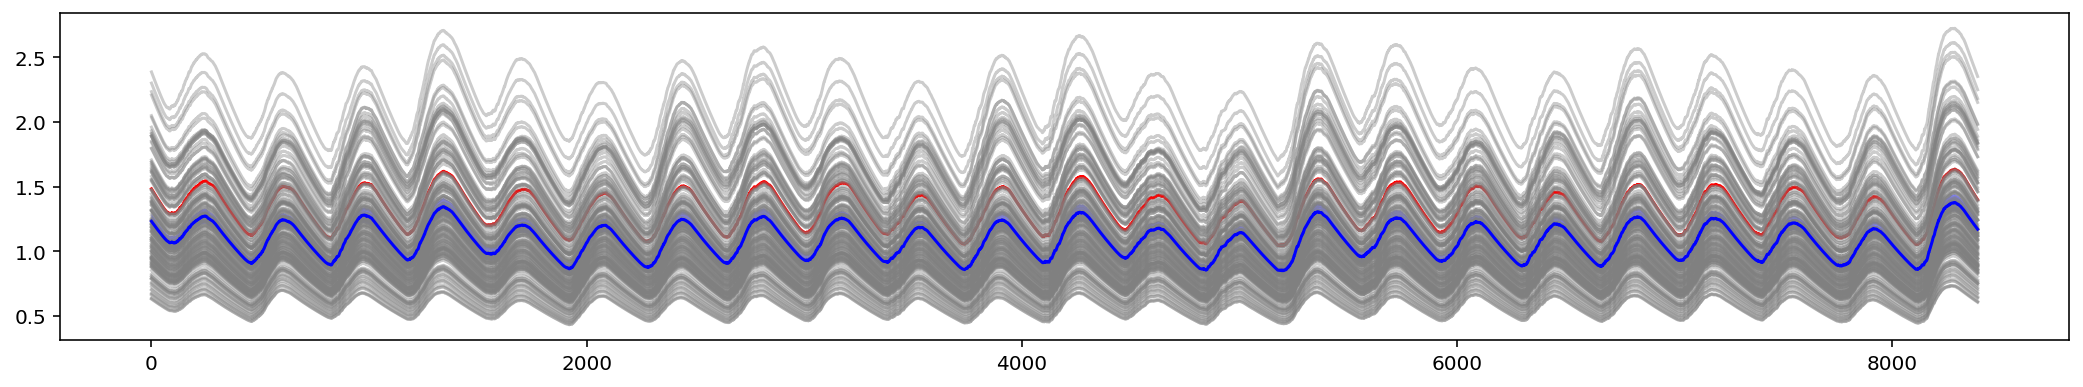

In [57]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
#ELM
ax.plot(lai_pft_elm,c='red')
#TAM
for i in range(lai_pft_tam.shape[0]):
    ax.plot(lai_pft_tam[i,:],c='grey',alpha=0.4)

ax.plot(lai_pft_tam[:,:].mean(axis=0),color='blue')
ax.fill_between(x=range(lai_pft_tam.shape[1]), y1=lai_interval[0],y2=lai_interval[1],facecolor='blue', alpha=0.5)

plt.show()

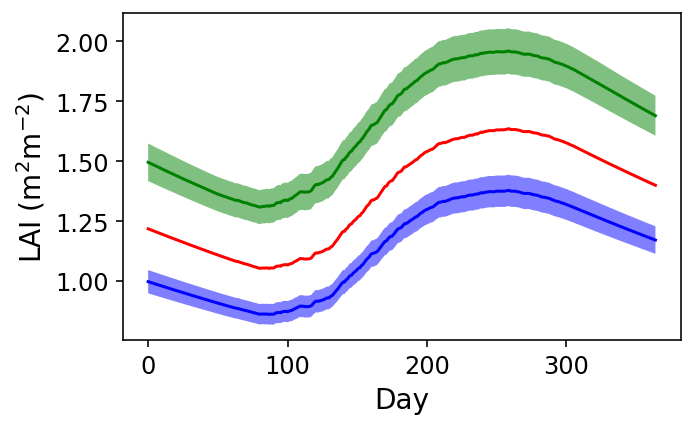

In [6]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(lai_pft_elm[-365:],c='red')
#TAM

ax.plot(lai_pft_tam_de[:,-365:].mean(axis=0),color='blue')
ax.fill_between(x=range(lai_pft_tam_de[:,-365:].shape[1]), y1=lai_interval_de[0][-365:],y2=lai_interval_de[1][-365:],facecolor='blue', alpha=0.5)

ax.plot(lai_pft_tam_as[:,-365:].mean(axis=0),color='green')
ax.fill_between(x=range(lai_pft_tam_as[:,-365:].shape[1]), y1=lai_interval_as[0][-365:],y2=lai_interval_as[1][-365:],facecolor='green', alpha=0.5)


ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('LAI (m$^2$m$^{-2}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)

plt.show()

## Leaf

In [10]:
######################Data########################
pft = int(0)
leaf_pft_elm    = df_1R.variables['leafc_pft'][:].squeeze()[:]
leaf_pft_tam_de = df_3R_de.variables['leafc_pft'][:].squeeze()[:]
leaf_pft_tam_as = df_3R_as.variables['leafc_pft'][:].squeeze()[:]

leaf_interval_de = confi_interval(leaf_pft_tam_de)
leaf_interval_as = confi_interval(leaf_pft_tam_as)

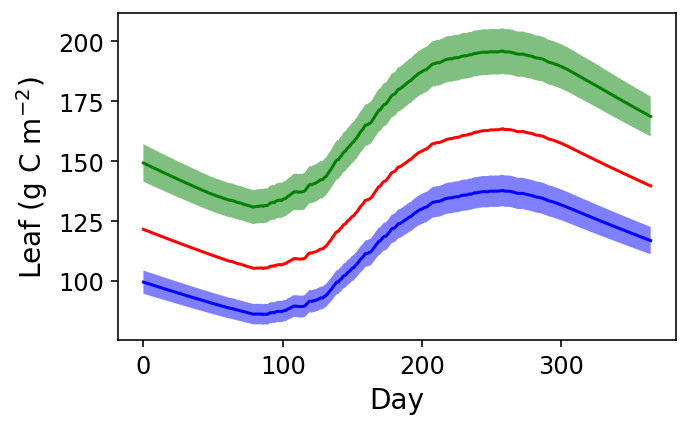

In [13]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(leaf_pft_elm[-365:],c='red')
#TAM

ax.plot(leaf_pft_tam_de[:,-365:].mean(axis=0),color='blue')
ax.fill_between(x=range(leaf_pft_tam_de[:,-365:].shape[1]), y1=leaf_interval_de[0][-365:],y2=leaf_interval_de[1][-365:],facecolor='blue', alpha=0.5)

ax.plot(leaf_pft_tam_as[:,-365:].mean(axis=0),color='green')
ax.fill_between(x=range(leaf_pft_tam_as[:,-365:].shape[1]), y1=leaf_interval_as[0][-365:],y2=leaf_interval_as[1][-365:],facecolor='green', alpha=0.5)


ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('Leaf (g C m$^{-2}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)

#plt.savefig("leaf_combined.pdf",bbox_inches='tight')

plt.show()

In [14]:
leaf_pft_elm    = df_1R.variables['leafc_pft'][:].squeeze()[:]
leaf_pft_tam_de = df_3R_de.variables['leafc_pft'][:].squeeze()[:]
leaf_pft_tam_as = df_3R_as.variables['leafc_pft'][:].squeeze()[:]
leaf_pft_tam_as_dd = df_3R_as_dd.variables['leafc_pft'][:].squeeze()[:,:]
leaf_pft_tam_de_dd = df_3R_de_dd.variables['leafc_pft'][:].squeeze()[:,:]

leaf_interval_de = confi_interval(leaf_pft_tam_de)
leaf_interval_as = confi_interval(leaf_pft_tam_as)
leaf_interval_as_dd = confi_interval(leaf_pft_tam_as_dd)
leaf_interval_de_dd = confi_interval(leaf_pft_tam_de_dd)

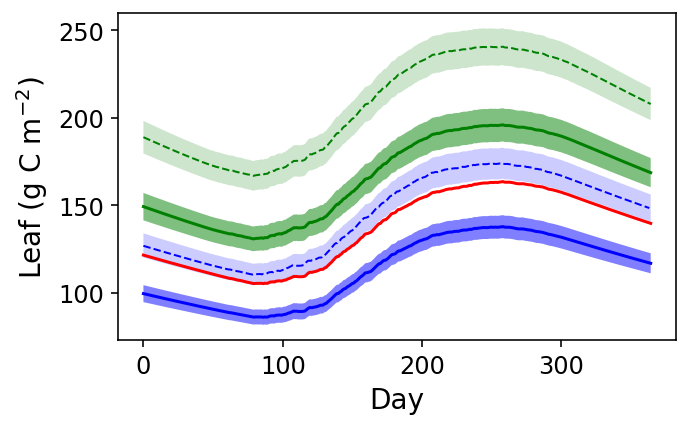

In [15]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(leaf_pft_elm[-365:],c='red')
#TAM

ax.plot(leaf_pft_tam_de[:,-365:].mean(axis=0),color='blue')
ax.fill_between(x=range(leaf_pft_tam_de[:,-365:].shape[1]), y1=leaf_interval_de[0][-365:],y2=leaf_interval_de[1][-365:],facecolor='blue', alpha=0.5)

ax.plot(leaf_pft_tam_as[:,-365:].mean(axis=0),color='green')
ax.fill_between(x=range(leaf_pft_tam_as[:,-365:].shape[1]), y1=leaf_interval_as[0][-365:],y2=leaf_interval_as[1][-365:],facecolor='green', alpha=0.5)

# ascend with Dynamic Distribution
ax.plot(leaf_pft_tam_as_dd[:,-365:].mean(axis=0),color='green',linewidth=1.0,linestyle='--')
ax.fill_between(x=range(leaf_pft_tam_as_dd[:,-365:].shape[1]), y1=leaf_interval_as_dd[0][-365:],y2=leaf_interval_as_dd[1][-365:],facecolor='green',alpha=0.2)


# descend with Dynamic Distribution
ax.plot(leaf_pft_tam_de_dd[:,-364:].mean(axis=0),color='blue',linewidth=1.0,linestyle='--')
ax.fill_between(x=range(leaf_pft_tam_de_dd[:,-365:].shape[1]), y1=leaf_interval_de_dd[0][-365:],y2=leaf_interval_de_dd[1][-365:],facecolor='blue', alpha=0.2)

ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('Leaf (g C m$^{-2}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)

#plt.savefig("leaf_combined.pdf",bbox_inches='tight')

plt.show()

## Fine root

In [8]:
######################Data########################
pft = int(0)
frootc_pft_elm = df_1R.variables['frootc_pft'][:].squeeze()[:]
frootc_pft_tam_de = df_3R_de.variables['frootc_pft'][:].squeeze()[:]
frootc_pft_tam_as = df_3R_as.variables['frootc_pft'][:].squeeze()[:]
frootc_interval_de= confi_interval(frootc_pft_tam_de)
frootc_interval_as= confi_interval(frootc_pft_tam_as)

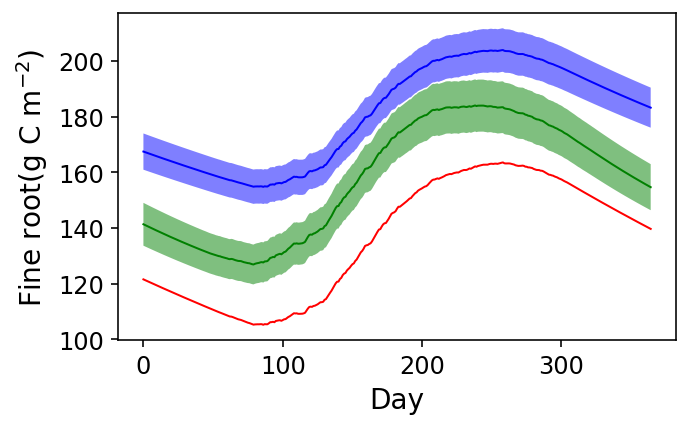

In [12]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(frootc_pft_elm[-365:],c='red',linewidth=1.0)
#TAM

ax.plot(frootc_pft_tam_de[:,-365:].mean(axis=0),color='blue', linewidth=1.0)
ax.fill_between(x=range(frootc_pft_tam_de[:,-365:].shape[1]), y1=frootc_interval_de[0][-365:],y2=frootc_interval_de[1][-365:],facecolor='blue', alpha=0.5)

ax.plot(frootc_pft_tam_as[:,-365:].mean(axis=0),color='green',linewidth=1.0)
ax.fill_between(x=range(frootc_pft_tam_as[:,-365:].shape[1]), y1=frootc_interval_as[0][-365:],y2=frootc_interval_as[1][-365:],facecolor='green', alpha=0.5)

ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('Fine root(g C m$^{-2}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)

#plt.savefig("root_combined.pdf",bbox_inches='tight')

plt.show()

In [9]:
frootc_pft_elm = df_1R.variables['frootc_pft'][:].squeeze()[:]
frootc_pft_tam_de = df_3R_de.variables['frootc_pft'][:].squeeze()[:]
frootc_pft_tam_as = df_3R_as.variables['frootc_pft'][:].squeeze()[:]
frootc_pft_tam_as_dd = df_3R_as_dd.variables['frootc_pft'][:].squeeze()[:,:]
frootc_pft_tam_de_dd = df_3R_de_dd.variables['frootc_pft'][:].squeeze()[:,:]

frootc_interval_de    = confi_interval(frootc_pft_tam_de)
frootc_interval_as    = confi_interval(frootc_pft_tam_as)
frootc_interval_as_dd = confi_interval(frootc_pft_tam_as_dd)
frootc_interval_de_dd = confi_interval(frootc_pft_tam_de_dd)

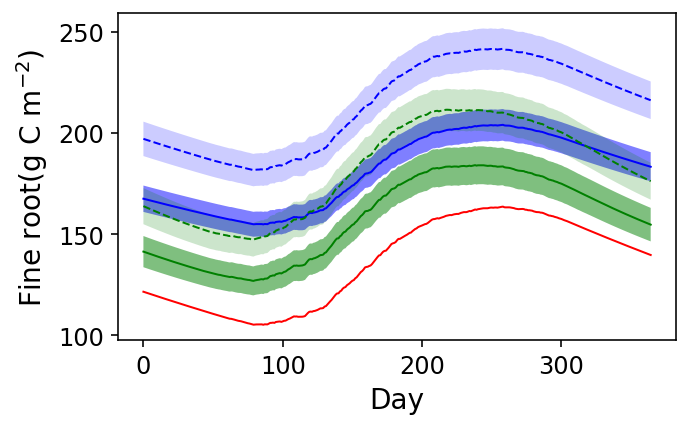

In [14]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(frootc_pft_elm[-365:],c='red',linewidth=1.0)
#TAM

ax.plot(frootc_pft_tam_de[:,-365:].mean(axis=0),color='blue', linewidth=1.0)
ax.fill_between(x=range(frootc_pft_tam_de[:,-365:].shape[1]), y1=frootc_interval_de[0][-365:],y2=frootc_interval_de[1][-365:],facecolor='blue', alpha=0.5)

ax.plot(frootc_pft_tam_as[:,-365:].mean(axis=0),color='green',linewidth=1.0)
ax.fill_between(x=range(frootc_pft_tam_as[:,-365:].shape[1]), y1=frootc_interval_as[0][-365:],y2=frootc_interval_as[1][-365:],facecolor='green', alpha=0.5)

# ascend with Dynamic Distribution
ax.plot(frootc_pft_tam_as_dd[:,-365:].mean(axis=0),color='green',linewidth=1.0,linestyle='--')
ax.fill_between(x=range(frootc_pft_tam_as_dd[:,-365:].shape[1]), y1=frootc_interval_as_dd[0][-365:],y2=frootc_interval_as_dd[1][-365:],facecolor='green',alpha=0.2)


# descend with Dynamic Distribution
ax.plot(frootc_pft_tam_de_dd[:,-365:].mean(axis=0),color='blue',linewidth=1.0,linestyle='--')
ax.fill_between(x=range(frootc_pft_tam_de_dd[:,-365:].shape[1]), y1=frootc_interval_de_dd[0][-365:],y2=frootc_interval_de_dd[1][-365:],facecolor='blue', alpha=0.2)


ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('Fine root(g C m$^{-2}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)

#plt.savefig("root_combined.pdf",bbox_inches='tight')

plt.show()

In [10]:
frootc95_tam_de   =frootc_pft_tam_de[:,-365:].mean(axis=0).mean()-confi_interval(frootc_pft_tam_de[:,-365:].mean(axis=1))[0]
frootc95_tam_de_dd=frootc_pft_tam_de_dd[:,-365:].mean(axis=0).mean()-confi_interval(frootc_pft_tam_de_dd[:,-365:].mean(axis=1))[0]

frootc95_tam_as    = frootc_pft_tam_as[:,-365:].mean(axis=0).mean()-confi_interval(frootc_pft_tam_as[:,-365:].mean(axis=1))[0]
frootc95_tam_as_dd = frootc_pft_tam_as_dd[:,-365:].mean(axis=0).mean()-confi_interval(frootc_pft_tam_as_dd[:,-365:].mean(axis=1))[0]

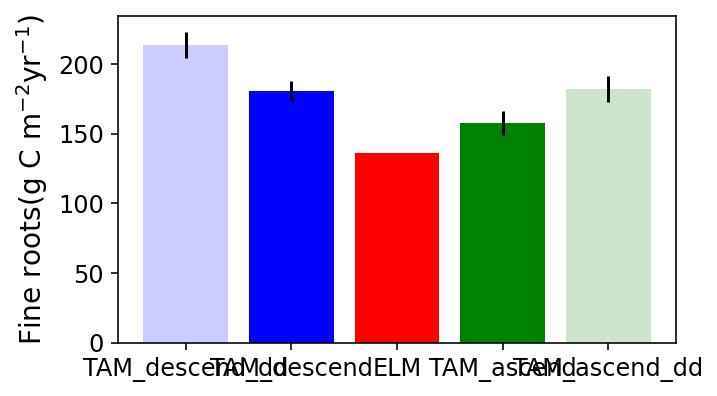

In [16]:
fig,ax = plt.subplots(1,1,figsize=(5,3))

# descend w/ dynamic distribution
ax.bar(['TAM_descend_dd'],frootc_pft_tam_de_dd[:,-364:].mean(axis=0).mean(),yerr=[frootc95_tam_de_dd],color='blue',alpha=0.2)

# descend
ax.bar(['TAM_descend'],frootc_pft_tam_de[:,-365:].mean(axis=0).mean(),yerr=[frootc95_tam_de],color='blue')

#ELM
ax.bar(['ELM'],frootc_pft_elm[-365:].mean(),color='red')

# ascend
ax.bar(['TAM_ascend'],frootc_pft_tam_as[:,-365:].mean(axis=0).mean(),yerr=[frootc95_tam_as],color='green')

# ascend w/ dynamic distribution
ax.bar(['TAM_ascend_dd'],frootc_pft_tam_as_dd[:,-365:].mean(axis=0).mean(),yerr=[frootc95_tam_as_dd],color='green',alpha=0.2)

#ax.set_xlabel(size=14,weight='normal')
ax.set_ylabel('Fine roots(g C m$^{-2}$yr$^{-1}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)


#plt.savefig("gpp_annual_combined.pdf",bbox_inches='tight')

plt.show()

## SOC

In [11]:
somc_elm       = df_1R.variables['totsomc'][:].squeeze()[:]/1000
somc_tam_de    = df_3R_de.variables['totsomc'][:].squeeze()[:,:]/1000
somc_tam_as    = df_3R_as.variables['totsomc'][:].squeeze()[:,:]/1000
somc_tam_as_dd = df_3R_as_dd.variables['totsomc'][:].squeeze()[:,:]/1000
somc_tam_de_dd = df_3R_de_dd.variables['totsomc'][:].squeeze()[:,:]/1000

somc_interval_de    = confi_interval(somc_tam_de)
somc_interval_as    = confi_interval(somc_tam_as)
somc_interval_as_dd = confi_interval(somc_tam_as_dd)
somc_interval_de_dd = confi_interval(somc_tam_de_dd)

In [12]:
somc95_tam_de    =somc_tam_de[:,-365:].mean(axis=0).mean()   -confi_interval(somc_tam_de[:,-365:].mean(axis=1))[0]
somc95_tam_de_dd =somc_tam_de_dd[:,-365:].mean(axis=0).mean()-confi_interval(somc_tam_de_dd[:,-365:].mean(axis=1))[0]

somc95_tam_as    =somc_tam_as[:,-365:].mean(axis=0).mean()   -confi_interval(somc_tam_as[:,-365:].mean(axis=1))[0]
somc95_tam_as_dd =somc_tam_as_dd[:,-365:].mean(axis=0).mean()-confi_interval(somc_tam_as_dd[:,-365:].mean(axis=1))[0]

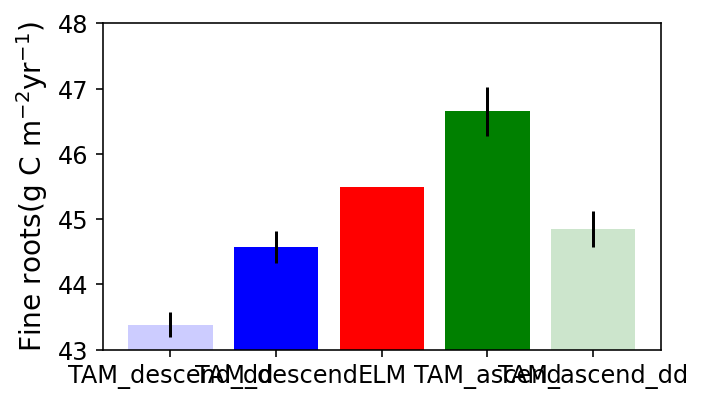

In [24]:
fig,ax = plt.subplots(1,1,figsize=(5,3))

# descend w/ dynamic distribution
ax.bar(['TAM_descend_dd'],somc_tam_de_dd[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_de_dd],color='blue',alpha=0.2)

# descend
ax.bar(['TAM_descend'],somc_tam_de[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_de],color='blue')

#ELM
ax.bar(['ELM'],somc_elm[-364:].mean(),color='red')

# ascend
ax.bar(['TAM_ascend'],somc_tam_as[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_as],color='green')

# ascend w/ dynamic distribution
ax.bar(['TAM_ascend_dd'],somc_tam_as_dd[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_as_dd],color='green',alpha=0.2)

#ax.set_xlabel(size=14,weight='normal')
ax.set_ylabel('Fine roots(g C m$^{-2}$yr$^{-1}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)
ax.set_ylim(43,48)


#plt.savefig("gpp_annual_combined.pdf",bbox_inches='tight')

plt.show()

## Competition

### FPG

In [16]:
######################Data########################
pft = int(0)
fpg_pft_elm       = df_1R.variables['fpg_pft'][:].squeeze()[:-1]
fpg_pft_tam_de    = df_3R_de.variables['fpg_pft'][:].squeeze()[:,:-1]
fpg_pft_tam_as    = df_3R_as.variables['fpg_pft'][:].squeeze()[:,:-1]
fpg_pft_tam_as_dd = df_3R_as_dd.variables['fpg_pft'][:].squeeze()[:,:-1]
fpg_pft_tam_de_dd = df_3R_de_dd.variables['fpg_pft'][:].squeeze()[:,:-1]

fpg_interval_de    = confi_interval(fpg_pft_tam_de)
fpg_interval_as    = confi_interval(fpg_pft_tam_as)
fpg_interval_as_dd = confi_interval(fpg_pft_tam_as_dd)
fpg_interval_de_dd = confi_interval(fpg_pft_tam_de_dd)

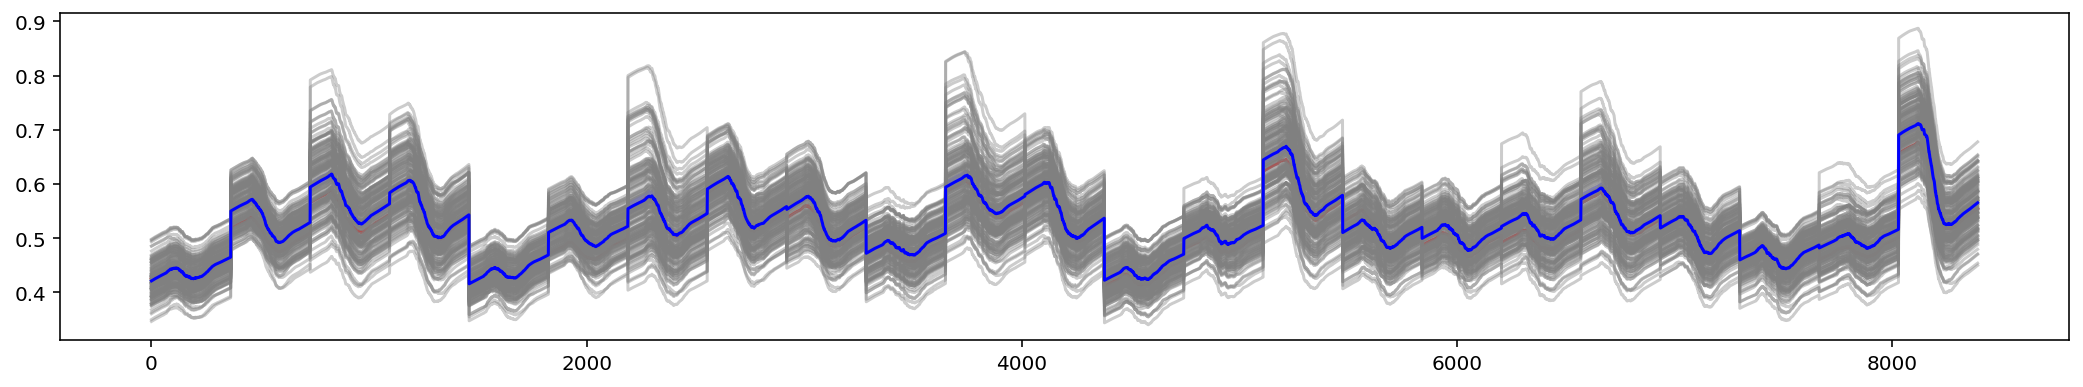

In [53]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
#ELM
ax.plot(fpg_pft_elm,c='red')
#TAM
for i in range(fpg_pft_tam.shape[0]):
    ax.plot(fpg_pft_tam[i,:],c='grey',alpha=0.4)

ax.plot(fpg_pft_tam[:,:].mean(axis=0),color='blue')
ax.fill_between(x=range(fpg_pft_tam.shape[1]), y1=fpg_interval[0],y2=fpg_interval[1],facecolor='blue', alpha=0.5)

plt.show()

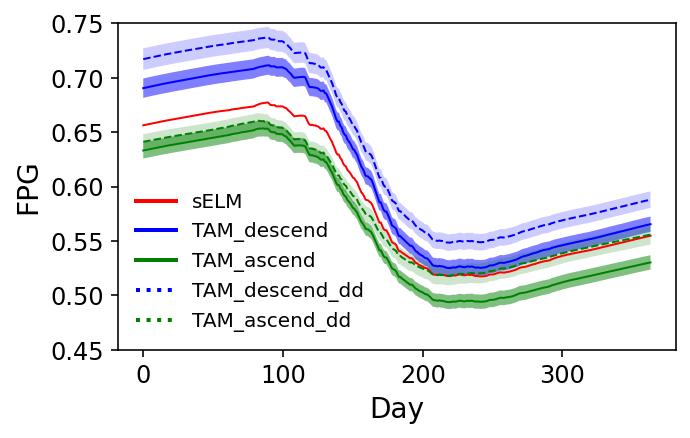

In [26]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(fpg_pft_elm[-364:],c='red',linewidth=1.0)

#TAM
#descend
ax.plot(fpg_pft_tam_de[:,-364:].mean(axis=0),color='blue',linewidth=1.0)
ax.fill_between(x=range(fpg_pft_tam_de[:,-364:].shape[1]), y1=fpg_interval_de[0][-364:],y2=fpg_interval_de[1][-364:],facecolor='blue', alpha=0.5)

#ascend
ax.plot(fpg_pft_tam_as[:,-364:].mean(axis=0),color='green',linewidth=1.0)
ax.fill_between(x=range(fpg_pft_tam_as[:,-364:].shape[1]), y1=fpg_interval_as[0][-364:],y2=fpg_interval_as[1][-364:],facecolor='green', alpha=0.5)

# ascend with Dynamic Distribution
ax.plot(fpg_pft_tam_as_dd[:,-364:].mean(axis=0),color='green',linewidth=1.0,linestyle='--')
ax.fill_between(x=range(fpg_pft_tam_as_dd[:,-364:].shape[1]), y1=fpg_interval_as_dd[0][-364:],y2=fpg_interval_as_dd[1][-364:],facecolor='green',alpha=0.2)


# descend with Dynamic Distribution
ax.plot(fpg_pft_tam_de_dd[:,-364:].mean(axis=0),color='blue',linewidth=1.0,linestyle='--')
ax.fill_between(x=range(fpg_pft_tam_de_dd[:,-364:].shape[1]), y1=fpg_interval_de_dd[0][-364:],y2=fpg_interval_de_dd[1][-364:],facecolor='blue', alpha=0.2)


ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('FPG',size=14,weight='normal')
ax.tick_params('both',labelsize=12)
ax.set_ylim(0.45,0.75)

#legend
legend_elements =[
    Line2D([0], [0], color='red',   lw=2, label='sELM'),
    Line2D([0], [0], color='blue',  lw=2, label='TAM_descend'),
    Line2D([0], [0], color='green', lw=2, label='TAM_ascend'),
    Line2D([0], [0], color='blue',  lw=2, ls=':',label='TAM_descend_dd'),
    Line2D([0], [0], color='green', lw=2, ls=':',label='TAM_ascend_dd')
]

ax.legend(handles=legend_elements,fontsize=10,frameon=False,loc='lower left')

#plt.savefig("fpg_combined.pdf",bbox_inches='tight')

plt.show()

### FPI

In [12]:
df_3R.variables['fpi_vr'][:].squeeze().shape

(32, 10, 8395)

In [29]:
df_1R.variables['fpi_vr'][:].squeeze().shape

(10, 8395)

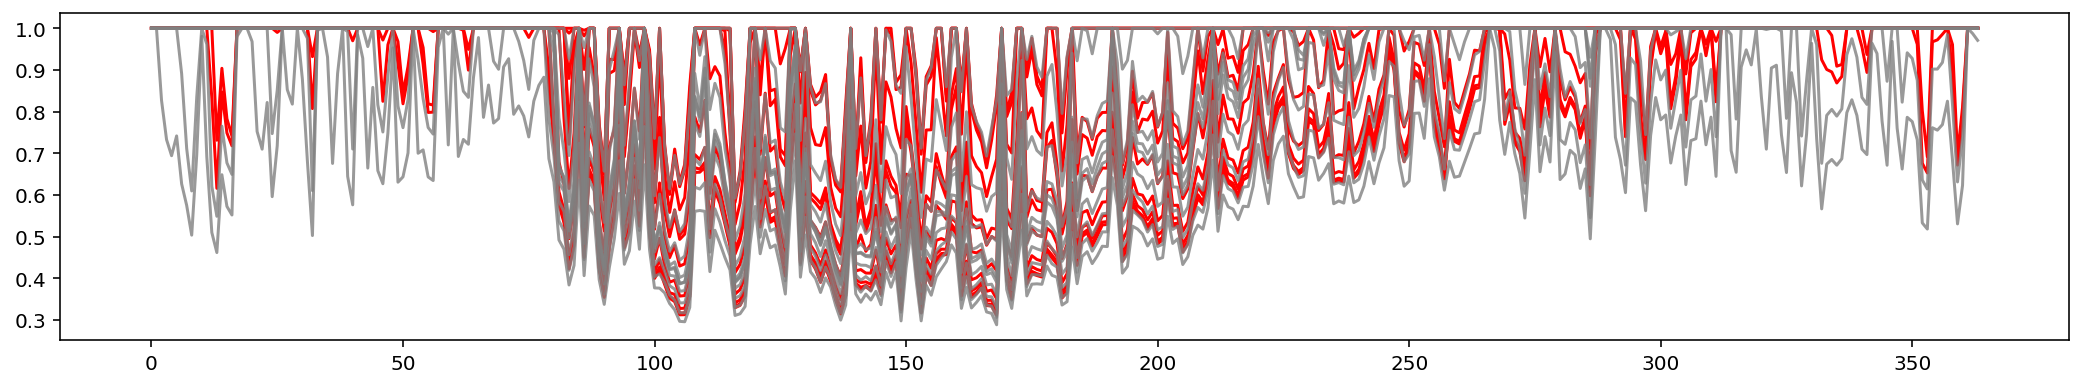

In [35]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
#ELM
#ax.plot(fpg_pft_elm,c='red')
ax.plot(df_1R.variables['fpi_vr'][:].squeeze()[:,-365:-1].T,color='red',alpha=1.0)

#TAM
#for i in range(fpg_pft_tam.shape[0]):
#    ax.plot(fpg_pft_tam[i,:],c='grey',alpha=0.4)

ax.plot(df_3R.variables['fpi_vr'][0].squeeze()[:,-365:-1].T,color='grey',alpha=0.8)

#ax.plot(fpg_pft_tam[:,:].mean(axis=0),color='blue')
#ax.fill_between(x=range(fpg_pft_tam.shape[1]), y1=fpg_interval[0],y2=fpg_interval[1],facecolor='blue', alpha=0.5)

plt.show()

## Prepare data for UQ

In [37]:
data_out = np.array([lai_pft_tam[:,-1],frootc_pft_tam[:,-1],fpg_pft_tam[:,-1]]).T
data_out.shape

(32, 3)

In [38]:
pnames = ['frootlong_t','frootlong_a','frootlong_m',
         'fr_flab_t','fr_flab_a','fr_flab_m',
         'fr_flig_t','fr_flig_a','fr_flig_m',
         'fr_fcel_t','fr_fcel_a','fr_fcel_m',
         'gdd_crit','gdd_crit_gap',
         'mort_depth_efolding']

In [49]:
pmin = [3 ,0.5,0.13,0.25*0.5,0.25*0.5,0.25*0.5, 0.25*0.5,0.25*0.5,0.25*0.5, 0.5*0.5,0.5*0.5,0.5*0.5, 100, 200,0.3743*0.5]
pmax = [10,4,  1,   0.25*1.5,0.25*1.5,0.25*1.5, 0.25*1.5,0.25*1.5,0.25*1.5, 0.5*1.5,0.5*1.5,0.5*1.5, 700, 600,0.3743*2.5]

In [39]:
#parm_out 
good = []
for p in pnames:
    good.append(df_3R.variables[p][:,0])    
parm_out = np.array(good).T
parm_out.shape

(32, 15)

In [48]:
np.savetxt('ytrain.dat', data_out[0:int(32*0.8),:])
np.savetxt('yval.dat',   data_out[int(32*0.8):,:])
np.savetxt('ptrain.dat', parm_out[0:int(32*0.8),:])
np.savetxt('pval.dat',   parm_out[int(32*0.8):,:])

In [52]:
myoutput = open('param_range.txt','w')
for p in range(len(pnames)):
    myoutput.write(str(pmin[p])+' '+str(pmax[p])+'\n')
myoutput.close()

## Combine panels 

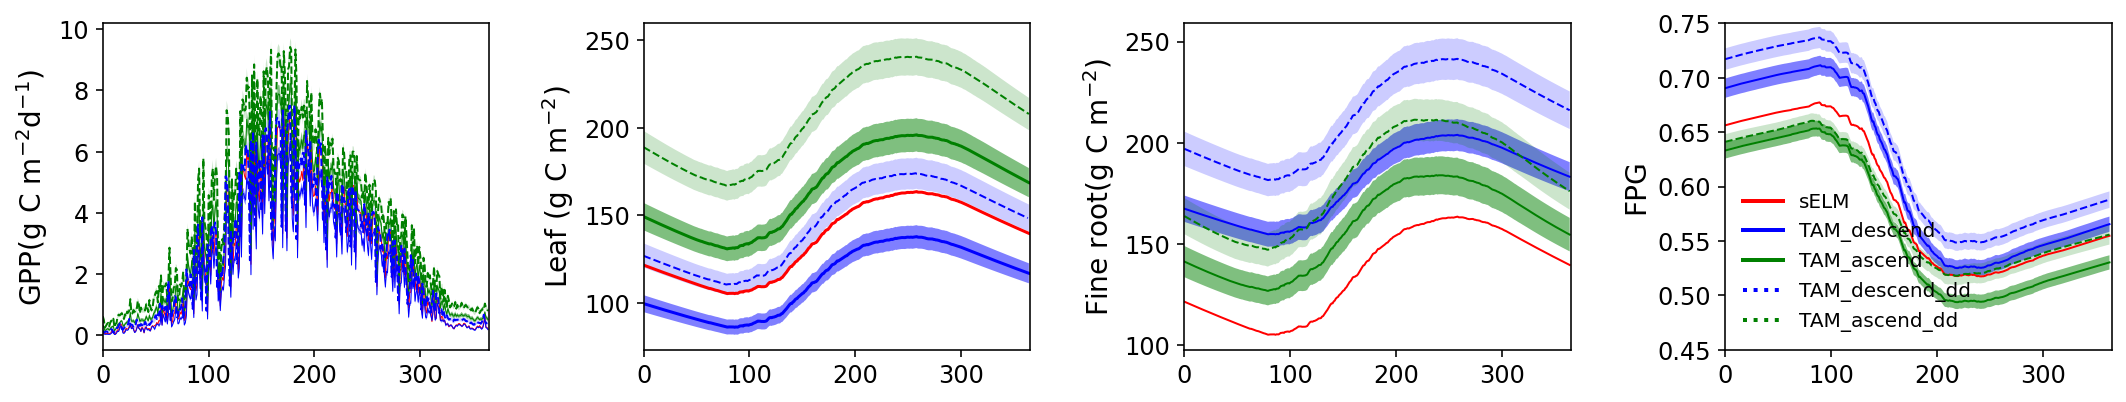

In [128]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18,3))


#########################GPP#########################
#ELM
ax1.plot(gpp_pft_elm[-365:],c='red',linewidth=0.5)
#TAM

ax1.plot(gpp_pft_tam_de[:,-365:].mean(axis=0),color='blue',linewidth=0.5)
ax1.fill_between(x=range(gpp_pft_tam_de[:,-365:].shape[1]), y1=gpp_interval_de[0][-365:],y2=gpp_interval_de[1][-365:],facecolor='blue', alpha=0.5)

ax1.plot(gpp_pft_tam_as[:,-365:].mean(axis=0),color='green',linewidth=0.5)
ax1.fill_between(x=range(gpp_pft_tam_as[:,-365:].shape[1]), y1=gpp_interval_as[0][-365:],y2=gpp_interval_as[1][-365:],facecolor='green', alpha=0.5)

# ascend with Dynamic Distribution
ax1.plot(gpp_pft_tam_as_dd[:,-365:].mean(axis=0),color='green',linewidth=1.0,linestyle='--')
ax1.fill_between(x=range(gpp_pft_tam_as_dd[:,-365:].shape[1]), y1=gpp_interval_as_dd[0][-365:],y2=gpp_interval_as_dd[1][-365:],facecolor='green',alpha=0.2)

# descend with Dynamic Distribution
ax1.plot(gpp_pft_tam_de_dd[:,-364:].mean(axis=0),color='blue',linewidth=1.0,linestyle='--')
ax1.fill_between(x=range(gpp_pft_tam_de_dd[:,-365:].shape[1]), y1=gpp_interval_de_dd[0][-365:],y2=gpp_interval_de_dd[1][-365:],facecolor='blue', alpha=0.2)

#ax1.set_xlabel('Day',size=14,weight='normal')
ax1.set_ylabel('GPP(g C m$^{-2}$d$^{-1}$)',size=14,weight='normal')
ax1.tick_params('both',labelsize=12)
ax1.set_xlim(0,365)

#########################LEAF#########################
#ELM
ax2.plot(leaf_pft_elm[-365:],c='red')
#TAM

ax2.plot(leaf_pft_tam_de[:,-365:].mean(axis=0),color='blue')
ax2.fill_between(x=range(leaf_pft_tam_de[:,-365:].shape[1]), y1=leaf_interval_de[0][-365:],y2=leaf_interval_de[1][-365:],facecolor='blue', alpha=0.5)

ax2.plot(leaf_pft_tam_as[:,-365:].mean(axis=0),color='green')
ax2.fill_between(x=range(leaf_pft_tam_as[:,-365:].shape[1]), y1=leaf_interval_as[0][-365:],y2=leaf_interval_as[1][-365:],facecolor='green', alpha=0.5)

# ascend with Dynamic Distribution
ax2.plot(leaf_pft_tam_as_dd[:,-365:].mean(axis=0),color='green',linewidth=1.0,linestyle='--')
ax2.fill_between(x=range(leaf_pft_tam_as_dd[:,-365:].shape[1]), y1=leaf_interval_as_dd[0][-365:],y2=leaf_interval_as_dd[1][-365:],facecolor='green',alpha=0.2)


# descend with Dynamic Distribution
ax2.plot(leaf_pft_tam_de_dd[:,-364:].mean(axis=0),color='blue',linewidth=1.0,linestyle='--')
ax2.fill_between(x=range(leaf_pft_tam_de_dd[:,-365:].shape[1]), y1=leaf_interval_de_dd[0][-365:],y2=leaf_interval_de_dd[1][-365:],facecolor='blue', alpha=0.2)

#ax2.set_xlabel('Day',size=14,weight='normal')
ax2.set_ylabel('Leaf (g C m$^{-2}$)',size=14,weight='normal')
ax2.tick_params('both',labelsize=12)
ax2.set_xlim(0,365)

#########################ROOT#########################

#ELM
ax3.plot(frootc_pft_elm[-365:],c='red',linewidth=1.0)
#TAM

ax3.plot(frootc_pft_tam_de[:,-365:].mean(axis=0),color='blue', linewidth=1.0)
ax3.fill_between(x=range(frootc_pft_tam_de[:,-365:].shape[1]), y1=frootc_interval_de[0][-365:],y2=frootc_interval_de[1][-365:],facecolor='blue', alpha=0.5)

ax3.plot(frootc_pft_tam_as[:,-365:].mean(axis=0),color='green',linewidth=1.0)
ax3.fill_between(x=range(frootc_pft_tam_as[:,-365:].shape[1]), y1=frootc_interval_as[0][-365:],y2=frootc_interval_as[1][-365:],facecolor='green', alpha=0.5)

# ascend with Dynamic Distribution
ax3.plot(frootc_pft_tam_as_dd[:,-365:].mean(axis=0),color='green',linewidth=1.0,linestyle='--')
ax3.fill_between(x=range(frootc_pft_tam_as_dd[:,-365:].shape[1]), y1=frootc_interval_as_dd[0][-365:],y2=frootc_interval_as_dd[1][-365:],facecolor='green',alpha=0.2)


# descend with Dynamic Distribution
ax3.plot(frootc_pft_tam_de_dd[:,-365:].mean(axis=0),color='blue',linewidth=1.0,linestyle='--')
ax3.fill_between(x=range(frootc_pft_tam_de_dd[:,-365:].shape[1]), y1=frootc_interval_de_dd[0][-365:],y2=frootc_interval_de_dd[1][-365:],facecolor='blue', alpha=0.2)

#ax3.set_xlabel('Day',size=14,weight='normal')
ax3.set_ylabel('Fine root(g C m$^{-2}$)',size=14,weight='normal')
ax3.tick_params('both',labelsize=12)
ax3.set_xlim(0,365)

#########################FPG#########################
#ELM
ax4.plot(fpg_pft_elm[-364:],c='red',linewidth=1.0)

#TAM
#descend
ax4.plot(fpg_pft_tam_de[:,-364:].mean(axis=0),color='blue',linewidth=1.0)
ax4.fill_between(x=range(fpg_pft_tam_de[:,-364:].shape[1]), y1=fpg_interval_de[0][-364:],y2=fpg_interval_de[1][-364:],facecolor='blue', alpha=0.5)

#ascend
ax4.plot(fpg_pft_tam_as[:,-364:].mean(axis=0),color='green',linewidth=1.0)
ax4.fill_between(x=range(fpg_pft_tam_as[:,-364:].shape[1]), y1=fpg_interval_as[0][-364:],y2=fpg_interval_as[1][-364:],facecolor='green', alpha=0.5)

# ascend with Dynamic Distribution
ax4.plot(fpg_pft_tam_as_dd[:,-364:].mean(axis=0),color='green',linewidth=1.0,linestyle='--')
ax4.fill_between(x=range(fpg_pft_tam_as_dd[:,-364:].shape[1]), y1=fpg_interval_as_dd[0][-364:],y2=fpg_interval_as_dd[1][-364:],facecolor='green',alpha=0.2)


# descend with Dynamic Distribution
ax4.plot(fpg_pft_tam_de_dd[:,-364:].mean(axis=0),color='blue',linewidth=1.0,linestyle='--')
ax4.fill_between(x=range(fpg_pft_tam_de_dd[:,-364:].shape[1]), y1=fpg_interval_de_dd[0][-364:],y2=fpg_interval_de_dd[1][-364:],facecolor='blue', alpha=0.2)


#ax4.set_xlabel('Day',size=14,weight='normal')
ax4.set_ylabel('FPG',size=14,weight='normal')
ax4.tick_params('both',labelsize=12)
ax4.set_ylim(0.45,0.75)
ax4.set_xlim(0,365)


#########################SOC#########################
# #ELM
# ax5.plot(somc_elm[-364:],c='red',linewidth=1.0)
# #TAM
# #descend
# ax5.plot(somc_tam_de[:,-364:].mean(axis=0),color='blue',linewidth=1.0)
# ax5.fill_between(x=range(somc_tam_de[:,-364:].shape[1]), y1=somc_interval_de[0][-364:],y2=somc_interval_de[1][-364:],facecolor='blue', alpha=0.5)

# #ascend
# ax5.plot(somc_tam_as[:,-364:].mean(axis=0),color='green',linewidth=1.0)
# ax5.fill_between(x=range(somc_tam_as[:,-364:].shape[1]), y1=somc_interval_as[0][-364:],y2=somc_interval_as[1][-364:],facecolor='green', alpha=0.5)

# # ascend with Dynamic Distribution
# ax5.plot(somc_tam_as_dd[:,-364:].mean(axis=0),color='green',linewidth=1.0,linestyle='--')
# ax5.fill_between(x=range(somc_tam_as_dd[:,-364:].shape[1]), y1=somc_interval_as_dd[0][-364:],y2=somc_interval_as_dd[1][-364:],facecolor='green',alpha=0.2)


# # descend with Dynamic Distribution
# ax5.plot(somc_tam_de_dd[:,-364:].mean(axis=0),color='blue',linewidth=1.0,linestyle='--')
# ax5.fill_between(x=range(somc_tam_de_dd[:,-364:].shape[1]), y1=somc_interval_de_dd[0][-364:],y2=somc_interval_de_dd[1][-364:],facecolor='blue', alpha=0.2)


# #ax4.set_xlabel('Day',size=14,weight='normal')
# ax5.set_ylabel('SOC(10$^{3}$ g C m$^{-3}$)',size=14,weight='normal')
# ax5.tick_params('both',labelsize=12)
# #ax5.set_ylim(0.45,0.75)
# ax5.set_xlim(0,365)



#legend
legend_elements =[
    Line2D([0], [0], color='red',   lw=2, label='sELM'),
    Line2D([0], [0], color='blue',  lw=2, label='TAM_descend'),
    Line2D([0], [0], color='green', lw=2, label='TAM_ascend'),
    Line2D([0], [0], color='blue',  lw=2, ls=':',label='TAM_descend_dd'),
    Line2D([0], [0], color='green', lw=2, ls=':',label='TAM_ascend_dd')
]

ax4.legend(handles=legend_elements,fontsize=10,frameon=False,loc='lower left')

plt.subplots_adjust(wspace=0.4)

plt.savefig("US-Ho1_preservation.pdf",bbox_inches='tight')

plt.show()

## version 2 + respiration

## Combine panels

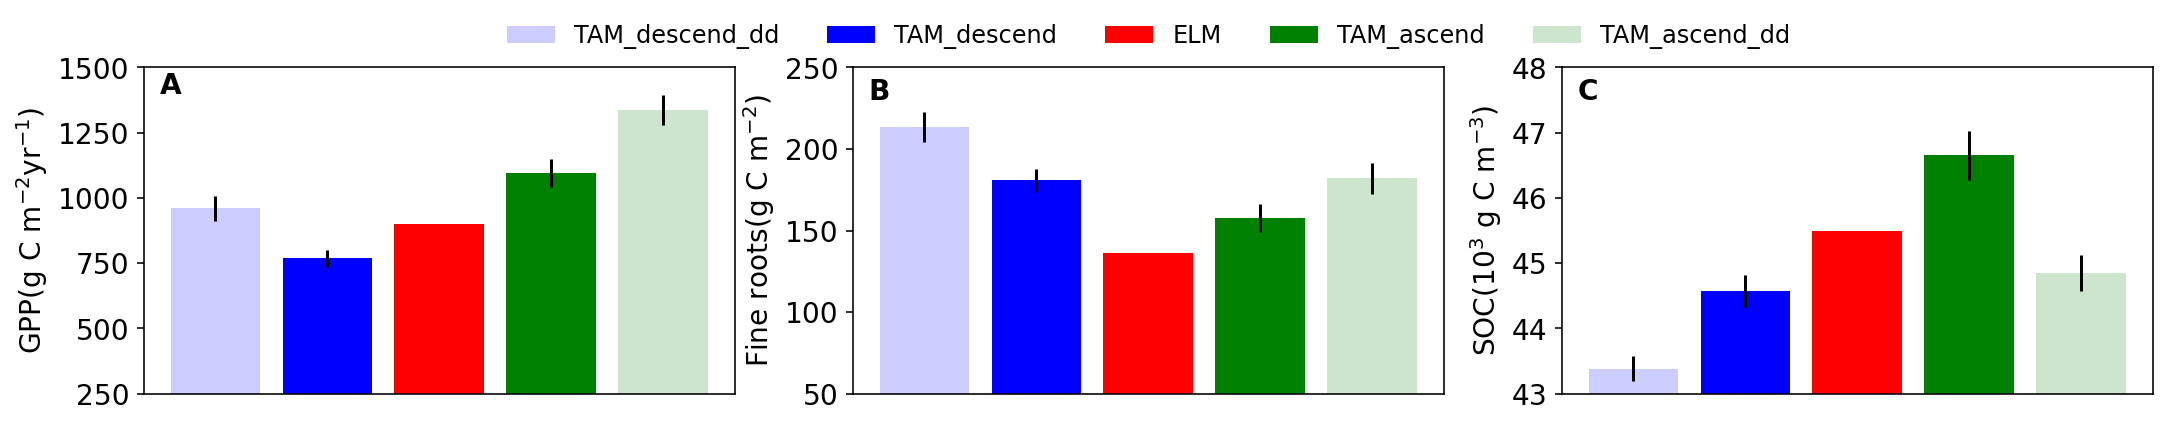

In [23]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,3))


# descend w/ dynamic distribution
ax1.bar(['TAM_de_dd'],gpp_pft_tam_de_dd[:,-364:].mean(axis=0).sum(),yerr=[gpp95_tam_de_dd],color='blue',alpha=0.2)

# descend
ax1.bar(['TAM_de'],gpp_pft_tam_de[:,-365:].mean(axis=0).sum(),yerr=[gpp95_tam_de],color='blue')

#ELM
ax1.bar(['ELM'],gpp_pft_elm[-365:].sum(),color='red')

# ascend
ax1.bar(['TAM_as'],gpp_pft_tam_as[:,-365:].mean(axis=0).sum(),yerr=[gpp95_tam_as],color='green')

# ascend w/ dynamic distribution
ax1.bar(['TAM_as_dd'],gpp_pft_tam_as_dd[:,-365:].mean(axis=0).sum(),yerr=[gpp95_tam_as_dd],color='green',alpha=0.2)

#ax.set_xlabel(size=14,weight='normal')
ax1.set_ylabel('GPP(g C m$^{-2}$yr$^{-1}$)',size=14,weight='normal')
ax1.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False,labelleft=True)
ax1.set_ylim(250,1500)
ax1.text(-0.5, 1400, "A", fontsize=14, weight='heavy')


# descend w/ dynamic distribution
ax2.bar(['TAM_descend_dd'],frootc_pft_tam_de_dd[:,-364:].mean(axis=0).mean(),yerr=[frootc95_tam_de_dd],color='blue',alpha=0.2)

# descend
ax2.bar(['TAM_descend'],frootc_pft_tam_de[:,-365:].mean(axis=0).mean(),yerr=[frootc95_tam_de],color='blue')

#ELM
ax2.bar(['ELM'],frootc_pft_elm[-365:].mean(),color='red')

# ascend
ax2.bar(['TAM_ascend'],frootc_pft_tam_as[:,-365:].mean(axis=0).mean(),yerr=[frootc95_tam_as],color='green')

# ascend w/ dynamic distribution
ax2.bar(['TAM_ascend_dd'],frootc_pft_tam_as_dd[:,-365:].mean(axis=0).mean(),yerr=[frootc95_tam_as_dd],color='green',alpha=0.2)

#ax.set_xlabel(size=14,weight='normal')
ax2.set_ylabel('Fine roots(g C m$^{-2}$)',size=14,weight='normal')
ax2.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False,labelleft=True)
ax2.set_ylim(50,250)
ax2.text(-0.5, 230, "B", fontsize=14, weight='heavy')


ax2.legend(['TAM_descend_dd','TAM_descend','ELM','TAM_ascend','TAM_ascend_dd'],
           loc='upper center',ncol=5,bbox_to_anchor=(0.5,1.2),
           fontsize=12,frameon=False)





# descend w/ dynamic distribution
ax3.bar(['TAM_descend_dd'],somc_tam_de_dd[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_de_dd],color='blue',alpha=0.2)

# descend
ax3.bar(['TAM_descend'],somc_tam_de[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_de],color='blue')

#ELM
ax3.bar(['ELM'],somc_elm[-364:].mean(),color='red')

# ascend
ax3.bar(['TAM_ascend'],somc_tam_as[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_as],color='green')

# ascend w/ dynamic distribution
ax3.bar(['TAM_ascend_dd'],somc_tam_as_dd[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_as_dd],color='green',alpha=0.2)

#ax.set_xlabel(size=14,weight='normal')
ax3.set_ylabel('SOC(10$^{3}$ g C m$^{-3}$)',size=14,weight='normal')
ax3.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False,labelleft=True)
ax3.set_ylim(43,48)
ax3.text(-0.5, 47.5, "C", fontsize=14, weight='heavy')


#plt.savefig("US-Ho1_preservation_annual.pdf",bbox_inches='tight')

plt.show()

## version 2: + respiration

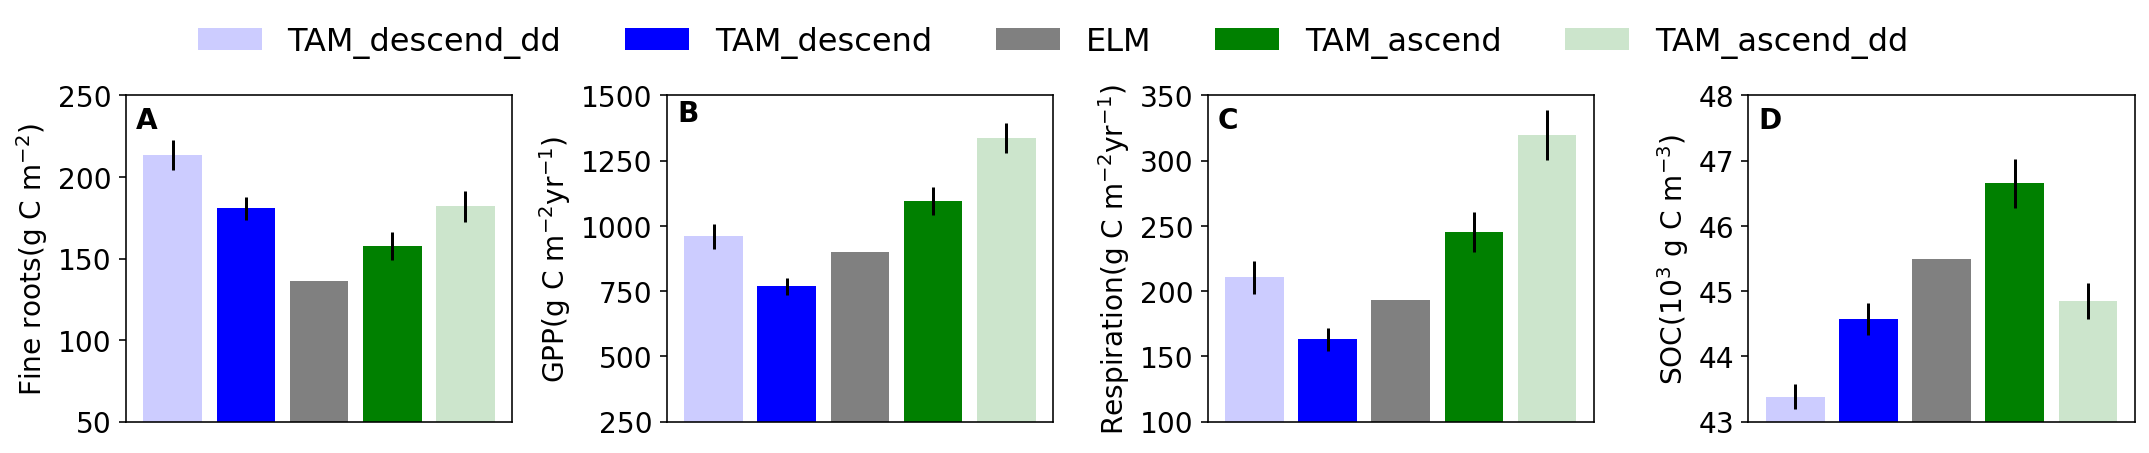

In [19]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18,3))



# descend w/ dynamic distribution
ax1.bar(['TAM_descend_dd'],frootc_pft_tam_de_dd[:,-364:].mean(axis=0).mean(),yerr=[frootc95_tam_de_dd],color='blue',alpha=0.2)

# descend
ax1.bar(['TAM_descend'],frootc_pft_tam_de[:,-365:].mean(axis=0).mean(),yerr=[frootc95_tam_de],color='blue')

#ELM
ax1.bar(['ELM'],frootc_pft_elm[-365:].mean(),color='grey')

# ascend
ax1.bar(['TAM_ascend'],frootc_pft_tam_as[:,-365:].mean(axis=0).mean(),yerr=[frootc95_tam_as],color='green')

# ascend w/ dynamic distribution
ax1.bar(['TAM_ascend_dd'],frootc_pft_tam_as_dd[:,-365:].mean(axis=0).mean(),yerr=[frootc95_tam_as_dd],color='green',alpha=0.2)

#ax.set_xlabel(size=14,weight='normal')
ax1.set_ylabel('Fine roots(g C m$^{-2}$)',size=14,weight='normal')
ax1.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False,labelleft=True)
ax1.set_ylim(50,250)
ax1.text(-0.5, 230, "A", fontsize=14, weight='heavy')



# descend w/ dynamic distribution
ax2.bar(['TAM_de_dd'],gpp_pft_tam_de_dd[:,-364:].mean(axis=0).sum(),yerr=[gpp95_tam_de_dd],color='blue',alpha=0.2)

# descend
ax2.bar(['TAM_de'],gpp_pft_tam_de[:,-365:].mean(axis=0).sum(),yerr=[gpp95_tam_de],color='blue')

#ELM
ax2.bar(['ELM'],gpp_pft_elm[-365:].sum(),color='grey')

# ascend
ax2.bar(['TAM_as'],gpp_pft_tam_as[:,-365:].mean(axis=0).sum(),yerr=[gpp95_tam_as],color='green')

# ascend w/ dynamic distribution
ax2.bar(['TAM_as_dd'],gpp_pft_tam_as_dd[:,-365:].mean(axis=0).sum(),yerr=[gpp95_tam_as_dd],color='green',alpha=0.2)

#ax.set_xlabel(size=14,weight='normal')
ax2.set_ylabel('GPP(g C m$^{-2}$yr$^{-1}$)',size=14,weight='normal')
ax2.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False,labelleft=True)
ax2.set_ylim(250,1500)
ax2.text(-0.5, 1400, "B", fontsize=14, weight='heavy')


ax2.legend(['TAM_descend_dd','TAM_descend','ELM','TAM_ascend','TAM_ascend_dd'],
           loc='upper center',ncol=5,bbox_to_anchor=(1.0,1.3),
           fontsize=16,frameon=False)



# descend w/ dynamic distribution
ax3.bar(['TAM_descend_dd'],hr_tam_de_dd[:,-364:].mean(axis=0).sum(),yerr=[hr95_tam_de_dd],color='blue',alpha=0.2)

# descend
ax3.bar(['TAM_descend'],hr_tam_de[:,-365:].mean(axis=0).sum(),yerr=[hr95_tam_de],color='blue')

#ELM
ax3.bar(['ELM'],hr_elm[-365:].sum(),color='grey')

# ascend
ax3.bar(['TAM_ascend'],hr_tam_as[:,-365:].mean(axis=0).sum(),yerr=[hr95_tam_as],color='green')

# ascend w/ dynamic distribution
ax3.bar(['TAM_ascend_dd'],hr_tam_as_dd[:,-365:].mean(axis=0).sum(),yerr=[hr95_tam_as_dd],color='green',alpha=0.2)

#ax.set_xlabel(size=14,weight='normal')
ax3.set_ylabel('Respiration(g C m$^{-2}$yr$^{-1}$)',size=14,weight='normal')
ax3.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False,labelleft=True)
ax3.set_ylim(100,350)
ax3.text(-0.5, 325, "C", fontsize=14, weight='heavy')



# descend w/ dynamic distribution
ax4.bar(['TAM_descend_dd'],somc_tam_de_dd[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_de_dd],color='blue',alpha=0.2)

# descend
ax4.bar(['TAM_descend'],somc_tam_de[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_de],color='blue')

#ELM
ax4.bar(['ELM'],somc_elm[-364:].mean(),color='grey')

# ascend
ax4.bar(['TAM_ascend'],somc_tam_as[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_as],color='green')

# ascend w/ dynamic distribution
ax4.bar(['TAM_ascend_dd'],somc_tam_as_dd[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_as_dd],color='green',alpha=0.2)

#ax.set_xlabel(size=14,weight='normal')
ax4.set_ylabel('SOC(10$^{3}$ g C m$^{-3}$)',size=14,weight='normal')
ax4.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False,labelleft=True)
ax4.set_ylim(43,48)
ax4.text(-0.5, 47.5, "D", fontsize=14, weight='heavy')


#
plt.subplots_adjust(wspace=0.4)

plt.savefig("US-Ho1_preservation_annual.pdf",bbox_inches='tight')

plt.show()

### Version 3

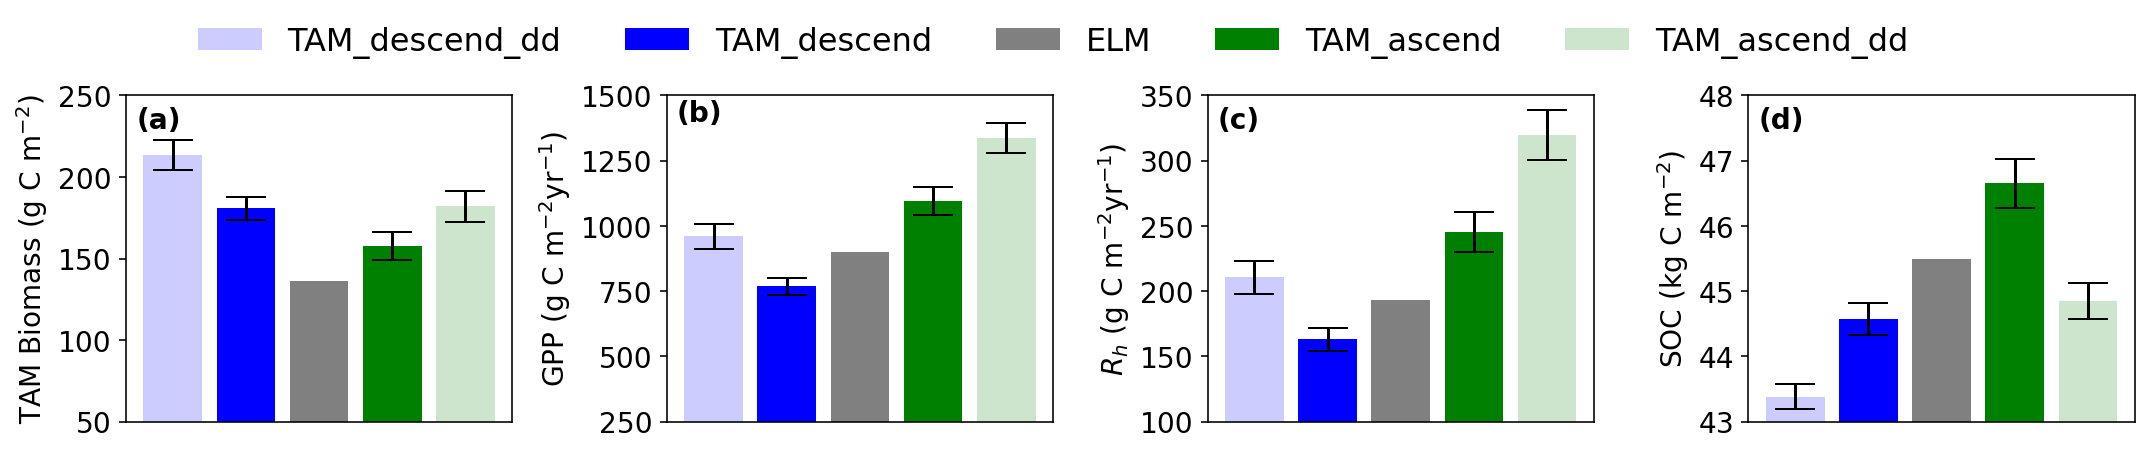

In [20]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18,3))



# descend w/ dynamic distribution
ax1.bar(['TAM_descend_dd'],frootc_pft_tam_de_dd[:,-364:].mean(axis=0).mean(),yerr=[frootc95_tam_de_dd],color='blue',alpha=0.2,capsize=10)

# descend
ax1.bar(['TAM_descend'],frootc_pft_tam_de[:,-365:].mean(axis=0).mean(),yerr=[frootc95_tam_de],color='blue',capsize=10)

#ELM
ax1.bar(['ELM'],frootc_pft_elm[-365:].mean(),color='grey')

# ascend
ax1.bar(['TAM_ascend'],frootc_pft_tam_as[:,-365:].mean(axis=0).mean(),yerr=[frootc95_tam_as],color='green',capsize=10)

# ascend w/ dynamic distribution
ax1.bar(['TAM_ascend_dd'],frootc_pft_tam_as_dd[:,-365:].mean(axis=0).mean(),yerr=[frootc95_tam_as_dd],color='green',alpha=0.2,capsize=10)

#ax.set_xlabel(size=14,weight='normal')
ax1.set_ylabel('TAM Biomass (g C m$^{-2}$)',size=14,weight='normal')
ax1.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False,labelleft=True)
ax1.set_ylim(50,250)
ax1.text(-0.5, 230, "(a)", fontsize=14, weight='heavy')



# descend w/ dynamic distribution
ax2.bar(['TAM_de_dd'],gpp_pft_tam_de_dd[:,-364:].mean(axis=0).sum(),yerr=[gpp95_tam_de_dd],color='blue',alpha=0.2,capsize=10)

# descend
ax2.bar(['TAM_de'],gpp_pft_tam_de[:,-365:].mean(axis=0).sum(),yerr=[gpp95_tam_de],color='blue',capsize=10)

#ELM
ax2.bar(['ELM'],gpp_pft_elm[-365:].sum(),color='grey')

# ascend
ax2.bar(['TAM_as'],gpp_pft_tam_as[:,-365:].mean(axis=0).sum(),yerr=[gpp95_tam_as],color='green',capsize=10)

# ascend w/ dynamic distribution
ax2.bar(['TAM_as_dd'],gpp_pft_tam_as_dd[:,-365:].mean(axis=0).sum(),yerr=[gpp95_tam_as_dd],color='green',alpha=0.2,capsize=10)

#ax.set_xlabel(size=14,weight='normal')
ax2.set_ylabel('GPP (g C m$^{-2}$yr$^{-1}$)',size=14,weight='normal')
ax2.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False,labelleft=True)
ax2.set_ylim(250,1500)
ax2.text(-0.5, 1400, "(b)", fontsize=14, weight='heavy')


ax2.legend(['TAM_descend_dd','TAM_descend','ELM','TAM_ascend','TAM_ascend_dd'],
           loc='upper center',ncol=5,bbox_to_anchor=(1.0,1.3),
           fontsize=16,frameon=False)



# descend w/ dynamic distribution
ax3.bar(['TAM_descend_dd'],hr_tam_de_dd[:,-364:].mean(axis=0).sum(),yerr=[hr95_tam_de_dd],color='blue',alpha=0.2,capsize=10)

# descend
ax3.bar(['TAM_descend'],hr_tam_de[:,-365:].mean(axis=0).sum(),yerr=[hr95_tam_de],color='blue',capsize=10)

#ELM
ax3.bar(['ELM'],hr_elm[-365:].sum(),color='grey')

# ascend
ax3.bar(['TAM_ascend'],hr_tam_as[:,-365:].mean(axis=0).sum(),yerr=[hr95_tam_as],color='green',capsize=10)

# ascend w/ dynamic distribution
ax3.bar(['TAM_ascend_dd'],hr_tam_as_dd[:,-365:].mean(axis=0).sum(),yerr=[hr95_tam_as_dd],color='green',alpha=0.2,capsize=10)

#ax.set_xlabel(size=14,weight='normal')
ax3.set_ylabel('$R_{h}$ (g C m$^{-2}$yr$^{-1}$)',size=14,weight='normal')
ax3.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False,labelleft=True)
ax3.set_ylim(100,350)
ax3.text(-0.5, 325, "(c)", fontsize=14, weight='heavy')



# descend w/ dynamic distribution
ax4.bar(['TAM_descend_dd'],somc_tam_de_dd[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_de_dd],color='blue',alpha=0.2,capsize=10)

# descend
ax4.bar(['TAM_descend'],somc_tam_de[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_de],color='blue',capsize=10)

#ELM
ax4.bar(['ELM'],somc_elm[-364:].mean(),color='grey')

# ascend
ax4.bar(['TAM_ascend'],somc_tam_as[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_as],color='green',capsize=10)

# ascend w/ dynamic distribution
ax4.bar(['TAM_ascend_dd'],somc_tam_as_dd[:,-364:].mean(axis=0).mean(),yerr=[somc95_tam_as_dd],color='green',alpha=0.2,capsize=10)

#ax.set_xlabel(size=14,weight='normal')
ax4.set_ylabel('SOC (kg C m$^{-2}$)',size=14,weight='normal')
ax4.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False,labelleft=True)
ax4.set_ylim(43,48)
ax4.text(-0.5, 47.5, "(d)", fontsize=14, weight='heavy')


#
plt.subplots_adjust(wspace=0.4)

plt.savefig("US-Ho1_preservation_annual.pdf",bbox_inches='tight')

plt.show()